**1. Initialization**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install -q tensorflow==2.0.0-beta1

import tensorflow as tf
import matplotlib.pyplot as plt

     |████████████████████████████████| 87.9MB 60kB/s 
     |████████████████████████████████| 3.1MB 32.3MB/s 
     |████████████████████████████████| 501kB 53.9MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

**2. Cost function graph**

	H(x):  [0. 0. 0.]
	cost(W):  4.6666665


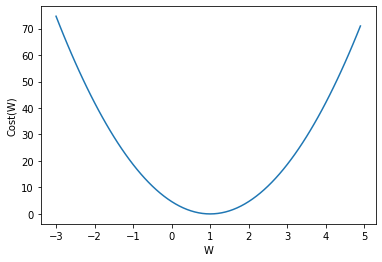

In [2]:
x_train = tf.Variable([1.0, 2.0, 3.0], tf.float32)
y_train = tf.Variable([1.0, 2.0, 3.0], tf.float32)

W = tf.Variable(0.0, dtype=tf.float32)

@tf.function
def hypothesis(x):
    return x * W

print("\tH(x): ", hypothesis(x_train).numpy())

@tf.function
def cost(x, y):
    return tf.reduce_mean(tf.square(hypothesis(x) - y))

print("\tcost(W): ", cost(x_train, y_train).numpy())

W_val = []
cost_val = []
for i in range(-30, 50):
    W.assign(i * 0.1)
    curr_cost = cost(x_train, y_train).numpy()
    W_val.append(W.numpy())
    cost_val.append(curr_cost)

plt.xlabel('W')
plt.ylabel('Cost(W)')
plt.plot(W_val, cost_val)
plt.show()

**3. Gradient descent 1**

In [3]:
x_train = tf.Variable([1.0, 2.0, 3.0], tf.float32)
y_train = tf.Variable([1.0, 2.0, 3.0], tf.float32)

W = tf.Variable(tf.random.uniform(shape=[], minval=0, maxval=1, dtype=tf.float32, seed=3))

@tf.function
def hypothesis(x):
    return x * W

print("\tH(x): ", hypothesis(x_train).numpy())

@tf.function
def cost(x, y):
    return tf.reduce_mean(tf.square(hypothesis(x) - y))

print("\tcost(W): ", cost(x_train, y_train).numpy())

learning_rate = 0.1

@tf.function
def gradient_descent(x, y):
    gradient = tf.reduce_mean((W * x - y) * x)
    descent = W - learning_rate * gradient
    update = W.assign(descent)

for step in range(21):
    gradient_descent(x_train, y_train)
    print("\tstep[{}] cost(W, b): {}, W: {}".format(step, cost(x_train, y_train).numpy(), W.numpy()))

	H(x):  [0.3869294 0.7738588 1.1607882]
	cost(W):  1.7539927
	step[0] cost(W, b): 0.4989131987094879, W: 0.6730290651321411
	step[1] cost(W, b): 0.141913041472435, W: 0.8256155252456665
	step[2] cost(W, b): 0.04036637023091316, W: 0.9069949388504028
	step[3] cost(W, b): 0.011481985449790955, W: 0.9503973126411438
	step[4] cost(W, b): 0.003265986917540431, W: 0.973545253276825
	step[5] cost(W, b): 0.000928992114495486, W: 0.985890805721283
	step[6] cost(W, b): 0.0002642455219756812, W: 0.9924750924110413
	step[7] cost(W, b): 7.516402547480538e-05, W: 0.9959867000579834
	step[8] cost(W, b): 2.137900264642667e-05, W: 0.9978595972061157
	step[9] cost(W, b): 6.081283572711982e-06, W: 0.9988584518432617
	step[10] cost(W, b): 1.7295066072620102e-06, W: 0.9993911981582642
	step[11] cost(W, b): 4.920862011204008e-07, W: 0.9996752738952637
	step[12] cost(W, b): 1.4005102855207952e-07, W: 0.9998267889022827
	step[13] cost(W, b): 3.980981944096129e-08, W: 0.9999076128005981
	step[14] cost(W, b): 1

**Gradient descent 2**

In [5]:
x_train = tf.Variable([1.0, 2.0, 3.0], tf.float32)
y_train = tf.Variable([1.0, 2.0, 3.0], tf.float32)

W = tf.Variable(-3.0, tf.float32)
# W = tf.Variable(5.0, tf.float32

@tf.function
def hypothesis(x):
    return x * W

print("\tH(x): ", hypothesis(x_train).numpy())

@tf.function
def cost(x, y):
    return tf.reduce_mean(tf.square(hypothesis(x) - y))

print("\tcost(W): ", cost(x_train, y_train).numpy())

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss = lambda: cost(x_train, y_train) 

for step in range(100):
    optimizer.minimize(loss, var_list=[W])
    if step % 10 == 0: 
        print("\tstep[{}] cost(W, b): {} W: {}".format(step, cost(x_train, y_train).numpy(), W.numpy()))


	H(x):  [-3. -6. -9.]
	cost(W):  74.666664
	step[0] cost(W, b): 61.37931442260742 W: -2.62666654586792
	step[10] cost(W, b): 8.649181365966797 W: -0.3613949120044708
	step[20] cost(W, b): 1.2187877893447876 W: 0.48895323276519775
	step[30] cost(W, b): 0.1717437505722046 W: 0.8081609010696411
	step[40] cost(W, b): 0.024200990796089172 W: 0.9279866218566895
	step[50] cost(W, b): 0.0034102473873645067 W: 0.972967267036438
	step[60] cost(W, b): 0.0004805484786629677 W: 0.9898523688316345
	step[70] cost(W, b): 6.771384505555034e-05 W: 0.9961907863616943
	step[80] cost(W, b): 9.541397048451472e-06 W: 0.9985700845718384
	step[90] cost(W, b): 1.3444823707686737e-06 W: 0.9994632601737976


**Gradient descent 3**

In [37]:
x_train = tf.Variable([1.0, 2.0, 3.0], tf.float32)
y_train = tf.Variable([1.0, 2.0, 3.0], tf.float32)

W = tf.Variable(5.0, tf.float32)

@tf.function
def hypothesis(x):
    return x * W

print("\tH(x): ", hypothesis(x_train).numpy())

@tf.function
def cost(x, y):
    return tf.reduce_mean(tf.square(hypothesis(x) - y))

print("\tcost(W): ", cost(x_train, y_train).numpy())

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

with tf.GradientTape() as tape:
    tape.watch(W)
    cost = cost(x_train, y_train)

tf_gradients = tape.gradient(cost, W)

for step in range(25):
    optimizer.apply_gradients([(tf_gradients, W)])
    print("\tstep[{}] tf_gradients {} W {}".format( \
        step, tf_gradients.numpy(), W.numpy()))


	H(x):  [ 5. 10. 15.]
	cost(W):  74.666664
	step[0] tf_gradients 37.333335876464844 W 4.62666654586792
	step[1] tf_gradients 37.333335876464844 W 4.25333309173584
	step[2] tf_gradients 37.333335876464844 W 3.8799996376037598
	step[3] tf_gradients 37.333335876464844 W 3.5066661834716797
	step[4] tf_gradients 37.333335876464844 W 3.1333327293395996
	step[5] tf_gradients 37.333335876464844 W 2.7599992752075195
	step[6] tf_gradients 37.333335876464844 W 2.3866658210754395
	step[7] tf_gradients 37.333335876464844 W 2.0133323669433594
	step[8] tf_gradients 37.333335876464844 W 1.6399990320205688
	step[9] tf_gradients 37.333335876464844 W 1.2666656970977783
	step[10] tf_gradients 37.333335876464844 W 0.8933323621749878
	step[11] tf_gradients 37.333335876464844 W 0.5199990272521973
	step[12] tf_gradients 37.333335876464844 W 0.14666566252708435
	step[13] tf_gradients 37.333335876464844 W -0.22666770219802856
	step[14] tf_gradients 37.333335876464844 W -0.6000010967254639
	step[15] tf_gradients